In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/english-handwritten-characters-dataset/english.csv
/kaggle/input/english-handwritten-characters-dataset/Img/img040-022.png
/kaggle/input/english-handwritten-characters-dataset/Img/img051-027.png
/kaggle/input/english-handwritten-characters-dataset/Img/img052-009.png
/kaggle/input/english-handwritten-characters-dataset/Img/img052-049.png
/kaggle/input/english-handwritten-characters-dataset/Img/img011-047.png
/kaggle/input/english-handwritten-characters-dataset/Img/img038-026.png
/kaggle/input/english-handwritten-characters-dataset/Img/img021-042.png
/kaggle/input/english-handwritten-characters-dataset/Img/img057-036.png
/kaggle/input/english-handwritten-characters-dataset/Img/img049-009.png
/kaggle/input/english-handwritten-characters-dataset/Img/img023-054.png
/kaggle/input/english-handwritten-characters-dataset/Img/img019-004.png
/kaggle/input/english-handwritten-characters-dataset/Img/img017-016.png
/kaggle/input/english-handwritten-characters-dataset/Img/img036-015.png

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from PIL import Image

In [4]:
df = pd.read_csv('/kaggle/input/english-handwritten-characters-dataset/english.csv')
df.head()

,image,label
0,Img/img001-001.png,0
1,Img/img001-002.png,0
2,Img/img001-003.png,0
3,Img/img001-004.png,0
4,Img/img001-005.png,0


In [5]:
df.columns

Index(['image', 'label'], dtype='object')

In [6]:
# The 'image' column contains file paths. Let's check the first few:
print("Sample image paths:")
print(df['image'].head())

Sample image paths:
0    Img/img001-001.png
1    Img/img001-002.png
2    Img/img001-003.png
3    Img/img001-004.png
4    Img/img001-005.png
Name: image, dtype: object


In [7]:
# Define a function to load an image and convert to grayscale numpy array
def load_image_as_array(img_path, base_path='/kaggle/input/english-handwritten-characters-dataset/'):
    # Full path
    full_path = os.path.join(base_path, img_path)
    # Open image and convert to grayscale 28x28
    img = Image.open(full_path).convert('L').resize((28,28))
    # Convert to numpy array and flatten
    return np.array(img).flatten()

In [8]:
# Load all images into a numpy array X
X = np.array([load_image_as_array(path) for path in df['image']])
y = df['label'].values

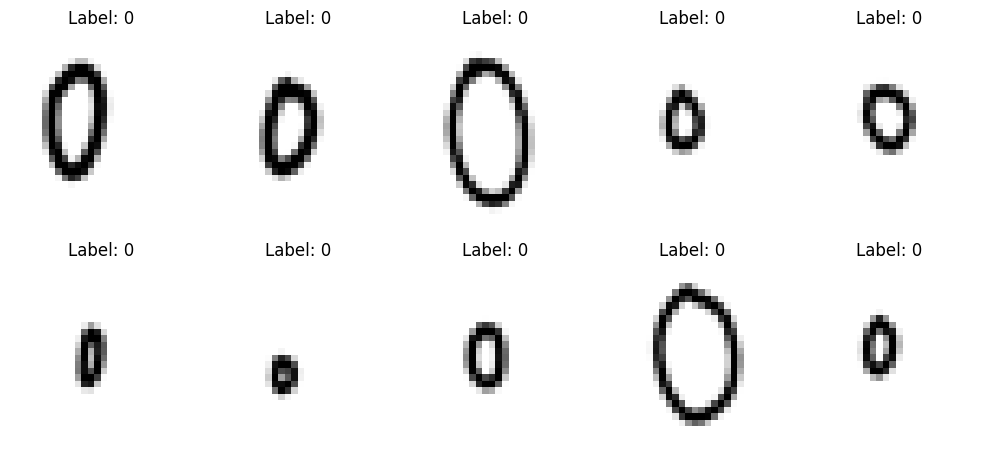

In [9]:
# Visualize some images
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X[i].reshape(28,28), cmap='gray')
    plt.title(f"Label: {y[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [10]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
# Predict on test set
y_pred = model.predict(X_test)

# Evaluate model
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.23      0.21      0.22        14
           1       0.17      0.36      0.24        11
           2       0.56      0.50      0.53        10
           3       0.56      0.25      0.34        20
           4       0.40      0.29      0.33        14
           5       0.50      0.25      0.33        16
           6       0.36      0.44      0.40         9
           7       0.37      0.47      0.41        15
           8       0.55      0.50      0.52        12
           9       0.50      0.55      0.52        11
           A       0.77      0.62      0.69        16
           B       0.33      0.44      0.38         9
           C       0.44      0.78      0.56         9
           D       0.56      0.50      0.53        10
           E       0.86      0.40      0.55        15
           F       0.64      0.64      0.64        14
           G       0.60      0.60      0.60        10
    

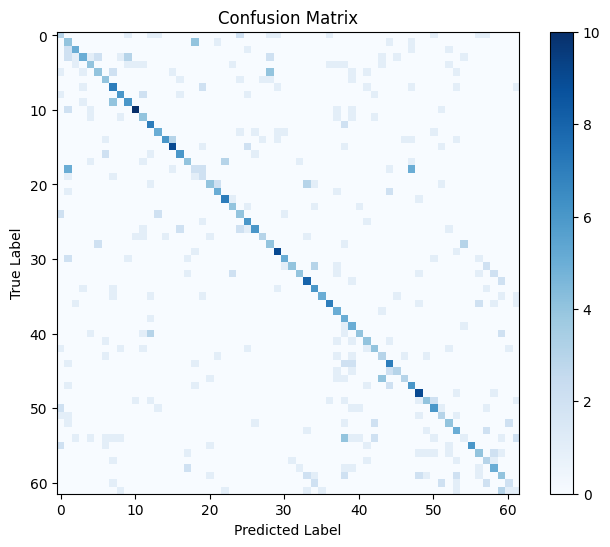

In [13]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

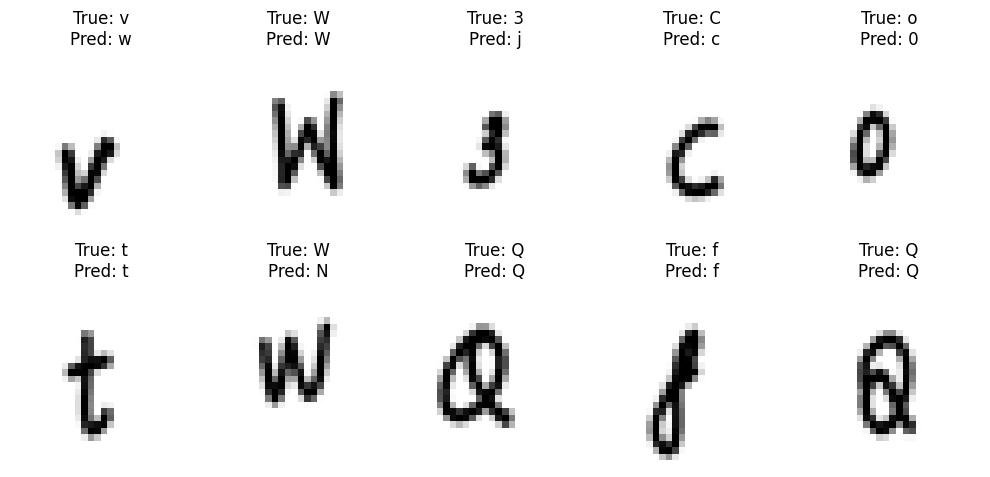

In [14]:
# Visualize some test predictions
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_test[i].reshape(28,28), cmap='gray')
    plt.title(f"True: {y_test[i]}\nPred: {y_pred[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()